In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.optimize import curve_fit
import pandas as pd
from scipy.optimize import minimize, differential_evolution

# Functions for 2 phases

def mixture_skew_normal_2(x, w1, w2, loc1, scale1, alpha1, loc2, scale2, alpha2):
    return w1 * skewnorm.pdf(x, alpha1, loc=loc1, scale=scale1) + \
           w2 * skewnorm.pdf(x, alpha2, loc=loc2, scale=scale2)

def error_function(params, bin_centers, hist):
    w1, loc1, d, scale1, alpha1, scale2, alpha2 = params
    loc2 = loc1 + d
    w2 = 1 - w1
    y_fit = mixture_skew_normal_2(bin_centers, w1, w2, loc1, scale1, alpha1, loc2, scale2, alpha2)
    return np.sum((hist - y_fit) ** 2)

# Functions for 3 phases

def mixture_skew_normal_3(x, w1, w2, w3, loc1, scale1, alpha1, loc2, scale2, alpha2, loc3, scale3, alpha3):
    return w1 * skewnorm.pdf(x, alpha1, loc=loc1, scale=scale1) + \
           w2 * skewnorm.pdf(x, alpha2, loc=loc2, scale=scale2) + \
           w3 * skewnorm.pdf(x, alpha3, loc=loc3, scale=scale3)

def error_function_3phases(params, bin_centers, hist):
    w1, w3, loc1, d1, d2, scale1, alpha1, scale2, alpha2, scale3, alpha3 = params
    w2 = 1 - (w1 + w3)
    loc2 = loc1 + d1
    loc3 = loc2 + d2
    dist1 = skewnorm.pdf(bin_centers, alpha1, loc=loc1, scale=scale1)
    dist2 = skewnorm.pdf(bin_centers, alpha2, loc=loc2, scale=scale2)
    dist3 = skewnorm.pdf(bin_centers, alpha3, loc=loc3, scale=scale3)
    y_fit = w1 * dist1 + w2 * dist2 + w3 * dist3
    return np.sum((hist - y_fit) ** 2)


# Contour plot

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CIEFMA/1 PhD/Gaussianes Nanoindentacio/Contour plots/HARDNESS_A.png'

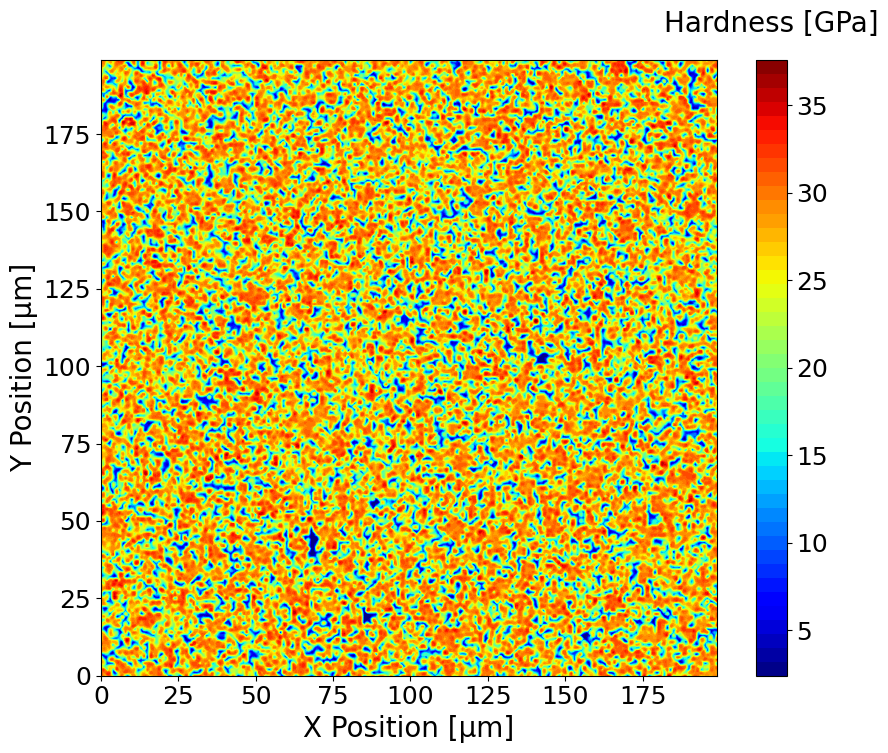

In [ ]:
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
# Extract the X, Y, and Z values
X-pos = df['X'].values
Y-pos = df['Y'].values
Z1 = df['HARDNESS'].values
Z2 = df['MODULUS'].values
# Sort the X and Y values while keeping the corresponding Z values
sort_indices = np.lexsort((Y, X))
X_sorted = X[sort_indices]
Y_sorted = Y[sort_indices]
Z1_sorted = Z1[sort_indices]
Z2_sorted = Z2[sort_indices]
# Define the vmin and vmax values for each subplot
vmin1, vmax1 = 3, 45
vmin2, vmax2 = 150, 800
# Generate a regular grid of points
new_X, new_Y = np.meshgrid(np.linspace(X_sorted.min(), X-pos_sorted.max(), 500),
                           np.linspace(Y_sorted.min(), Y-pos_sorted.max(), 500))

# Interpolate the Z values on the regular grid using griddata
Z1_interp = griddata((X_sorted, Y_sorted), Z1_sorted, (new_X, new_Y), method='cubic')
Z2_interp = griddata((X_sorted, Y_sorted), Z2_sorted, (new_X, new_Y), method='cubic')


# Plot the first subplot
fig1 = plt.figure(figsize=(10, 8))
plt.gca().set_aspect('equal')
Z1_matrix_clipped = np.clip(Z1_interp, vmin1, vmax1)
levels = 50
im1 = plt.contourf(new_X, new_Y, Z1_matrix_clipped, cmap='jet', levels=levels)
plt.xlabel('X Position [μm]', fontsize= 20)
plt.ylabel('Y Position [μm]', fontsize= 20)
plt.tick_params(axis='both', which='major', labelsize=18)
cbar1 = fig1.colorbar(im1)
cbar1.ax.set_title('Hardness [GPa]', fontsize=20, pad=20)
cbar1.ax.yaxis.set_label_coords(-0.1, 0.5)
cbar1.ax.tick_params(labelsize=18)
# Set the colorbar tick labels to display every 5 units
from matplotlib.ticker import MultipleLocator
tick_spacing = 5
cbar1.ax.yaxis.set_major_locator(MultipleLocator(tick_spacing))
fig1.savefig(f'/content/drive/MyDrive/CIEFMA/1 PhD/Gaussianes Nanoindentacio/Contour plots/HARDNESS_{name}.png',dpi=1200)



# Plot the second subplot
fig2 = plt.figure(figsize=(10, 8))
plt.gca().set_aspect('equal')
Z2_matrix_clipped = np.clip(Z2_interp, vmin2, vmax2)
levels = 45
im2 = plt.contourf(new_X, new_Y, Z2_matrix_clipped, cmap='jet', levels=levels)
plt.xlabel('X Position [μm]', fontsize= 20)
plt.ylabel('Y Position [μm]', fontsize= 20)
plt.tick_params(axis='both', which='major', labelsize=18)
cbar2 = fig2.colorbar(im2)
cbar2.ax.set_title('Modulus [GPa]', fontsize= 20, pad=20)
cbar2.ax.yaxis.set_label_coords(-0.1, 0.5)
cbar2.ax.tick_params(labelsize=18)
# Set the colorbar tick labels to display every 5 units
from matplotlib.ticker import MultipleLocator
tick_spacing = 50
cbar2.ax.yaxis.set_major_locator(MultipleLocator(tick_spacing))

In [ ]:
# Upper limit of percentage of binder
b = 1

In [ ]:
# ------------------------------------------------------------
# Parameters Explanation for Mixture of Skew-Normal Distributions
# ------------------------------------------------------------
# Each skew-normal distribution is defined by three main parameters:
# 1. loc (Location): This parameter tells us where the peak of the distribution is placed
#    along the x-axis. It controls the position of the "center" of the distribution.
#    This parameter represents the mode of the distribution
#
# 2. scale (Scale): This controls how wide or narrow the distribution is. It's similar to
#    the standard deviation, where a higher scale value means the distribution is spread out more.
#
# 3. alpha (Skewness): This controls how "asymmetric" the distribution is.
#    Positive values mean the distribution has a longer tail on the right (right-skewed),
#    and negative values mean it has a longer tail on the left (left-skewed).
#    When alpha = 0, the distribution is symmetric like a normal distribution.

In [ ]:
excel = '/content/S50-4D-tot.xlsx'
sheet_name = 'Test 1'

# Extract the 'HARDNESS' values as data
df = pd.read_excel(excel, sheet_name)
df.dropna(subset=['HARDNESS'], inplace=True)
df = df.iloc[1:]
X = df['HARDNESS'].values.astype(float)
Y = df['MODULUS'].values.astype(float)

# 2 cluster

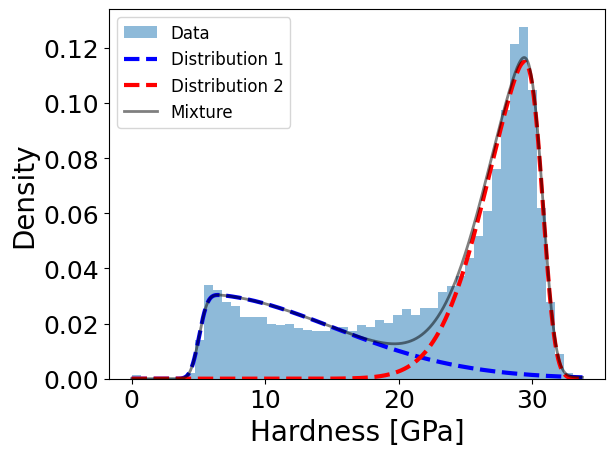

Parameter values Hardness:
w1: 0.39
w2: 0.61
loc1: 5.06
distancia (d): 25.74
scale1: 10.00
alpha1: 20.00
loc2: 30.80
scale2: 3.89
alpha2: -5.30


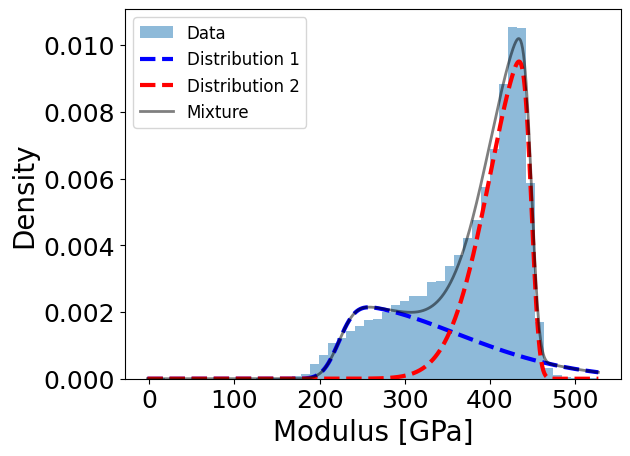

Parameter values MODULUS:
w1: 0.39
w2: 0.61
loc1: 222.51
distancia (d): 226.17
scale1: 137.50
alpha1: 9.00
loc2: 448.68
scale2: 48.35
alpha2: -6.87


In [ ]:
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# HARDNESS

# HARDNESS: Compute histogram and bin centers for hardness data
hist_hardness, bin_edges_hardness = np.histogram(X, bins=50, density=True)
bin_centers_hardness = (bin_edges_hardness[:-1] + bin_edges_hardness[1:]) / 2

# Define bounds for the differential evolution algorithm (Hardness)
bounds_hardness = [(0, b),             # w1 (weight)
                    (0, 10),            # loc1 (location)
                    (0.5, 100),         # d (distance between loc1 and loc2)
                    (0.1, 10),          # scale1 (spread for skew-normal 1)
                    (0, 20),         # alpha1 (skewness for skew-normal 1)
                    (0.1, 100),         # scale2 (spread for skew-normal 2)
                    (-20, 0)]        # alpha2 (skewness for skew-normal 2)

# Perform the optimization using differential evolution for HARDNESS
result_hardness = differential_evolution(
    error_function,
    bounds_hardness,
    args=(bin_centers_hardness, hist_hardness),
    maxiter=10000,        # Max number of iterations
    tol=1e-7,             # Tolerance for convergence
    popsize=30            # Population size (optional: larger value explores more)
)
params_hardness = result_hardness.x

loc2_hardness = params_hardness[1] + params_hardness[2]  # loc2 = loc1 + d (Hardness)
w2_hardness = 1 - params_hardness[0]  # w2 (second weight for mixture)

# Generate fitted skew-normal distributions for Hardness
x_hardness = np.linspace(np.min(X), np.max(X), 1000)
skew_normal_hardness_1 = skewnorm.pdf(x_hardness, params_hardness[4], loc=params_hardness[1], scale=params_hardness[3])
skew_normal_hardness_2 = skewnorm.pdf(x_hardness, params_hardness[6], loc=loc2_hardness, scale=params_hardness[5])

# Plot the histogram and fitted distributions (Hardness)
plt.hist(X, bins=50, density=True, alpha=0.5, label='Data')
plt.plot(x_hardness, params_hardness[0] * skew_normal_hardness_1, 'b--', lw=3, alpha=1, label='Distribution 1')
plt.plot(x_hardness, w2_hardness * skew_normal_hardness_2, 'r--', lw=3, alpha=1, label='Distribution 2')

# Plot the mixture of skew-normal distributions
y_hardness = params_hardness[0] * skew_normal_hardness_1 + w2_hardness * skew_normal_hardness_2
plt.plot(x_hardness, y_hardness, 'k-', lw=2, alpha=0.5, label='Mixture')

# Labels and legend for Hardness
plt.xlabel('Hardness [GPa]', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=12)
plt.show()

# Print parameter values for HARDNESS
print("Parameter values Hardness:")
print("w1: {:.2f}".format(params_hardness[0]))
print("w2: {:.2f}".format(w2_hardness))
print("loc1: {:.2f}".format(params_hardness[1]))
print("distancia (d): {:.2f}".format(params_hardness[2]))
print("scale1: {:.2f}".format(params_hardness[3]))
print("alpha1: {:.2f}".format(params_hardness[4]))
print("loc2: {:.2f}".format(loc2_hardness))
print("scale2: {:.2f}".format(params_hardness[5]))
print("alpha2: {:.2f}".format(params_hardness[6]))

# MODULUS: Using the same weights from Hardness (w1 and w2 fixed)

# Compute histogram and bin centers for Modulus data
hist_modulus, bin_edges_modulus = np.histogram(Y, bins=50, density=True)
bin_centers_modulus = (bin_edges_modulus[:-1] + bin_edges_modulus[1:]) / 2

# Fix the weights (w1 and w2) from Hardness
w1_fixed = params_hardness[0]
w2_fixed = 1 - w1_fixed

# Define bounds for Modulus fitting (other parameters to be optimized)
bounds_modulus = [(0, 250),          # loc1 (location for Modulus)
                  (50, 1000),        # d (distance between loc1 and loc2)
                  (1, 1000),         # scale1 (spread for skew-normal 1)
                  (9, 20),        # alpha1 (skewness for skew-normal 1)
                  (1, 1000),         # scale2 (spread for skew-normal 2)
                  (-20, 0.1)]        # alpha2 (skewness for skew-normal 2)

# Error function for Modulus fitting (w1 and w2 are fixed)
def error_function_modulus(params_mod, bin_centers_mod, hist_mod):
    loc1, d, scale1, alpha1, scale2, alpha2 = params_mod
    loc2 = loc1 + d
    y_fit_modulus = w1_fixed * skewnorm.pdf(bin_centers_mod, alpha1, loc=loc1, scale=scale1) + \
                    w2_fixed * skewnorm.pdf(bin_centers_mod, alpha2, loc=loc2, scale=scale2)
    return np.sum((hist_mod - y_fit_modulus) ** 2)

# Perform the optimization for Modulus with fixed weights
result_modulus = differential_evolution(
    error_function_modulus,
    bounds_modulus,
    args=(bin_centers_modulus, hist_modulus),
    maxiter=10000,        # Max number of iterations
    tol=1e-7,             # Tolerance for convergence
    popsize=30            # Population size (optional: larger value explores more)
)
params_modulus = result_modulus.x

# Calculate loc2 for Modulus
loc2_modulus = params_modulus[0] + params_modulus[1]

# Generate fitted skew-normal distributions for Modulus
x_modulus = np.linspace(np.min(Y), np.max(Y), 1000)
skew_normal_modulus_1 = skewnorm.pdf(x_modulus, params_modulus[3], loc=params_modulus[0], scale=params_modulus[2])
skew_normal_modulus_2 = skewnorm.pdf(x_modulus, params_modulus[5], loc=loc2_modulus, scale=params_modulus[4])

# Plot the histogram and fitted distributions (Modulus)
plt.hist(Y, bins=50, density=True, alpha=0.5, label='Data')
plt.plot(x_modulus, w1_fixed * skew_normal_modulus_1, 'b--', lw=3, alpha=1, label='Distribution 1')
plt.plot(x_modulus, w2_fixed * skew_normal_modulus_2, 'r--', lw=3, alpha=1, label='Distribution 2')

# Plot the mixture of skew-normal distributions for Modulus
y_modulus = w1_fixed * skew_normal_modulus_1 + w2_fixed * skew_normal_modulus_2
plt.plot(x_modulus, y_modulus, 'k-', lw=2, alpha=0.5, label='Mixture')

# Labels and legend for Modulus
plt.xlabel('Modulus [GPa]', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=12)
plt.show()

# Print parameter values for MODULUS
print("Parameter values MODULUS:")
print("w1: {:.2f}".format(w1_fixed))
print("w2: {:.2f}".format(w2_fixed))
print("loc1: {:.2f}".format(params_modulus[0]))
print("distancia (d): {:.2f}".format(params_modulus[1]))
print("scale1: {:.2f}".format(params_modulus[2]))
print("alpha1: {:.2f}".format(params_modulus[3]))
print("loc2: {:.2f}".format(loc2_modulus))
print("scale2: {:.2f}".format(params_modulus[4]))
print("alpha2: {:.2f}".format(params_modulus[5]))


Cluster 1: 23.87% of the data points
Cluster 2: 76.13% of the data points


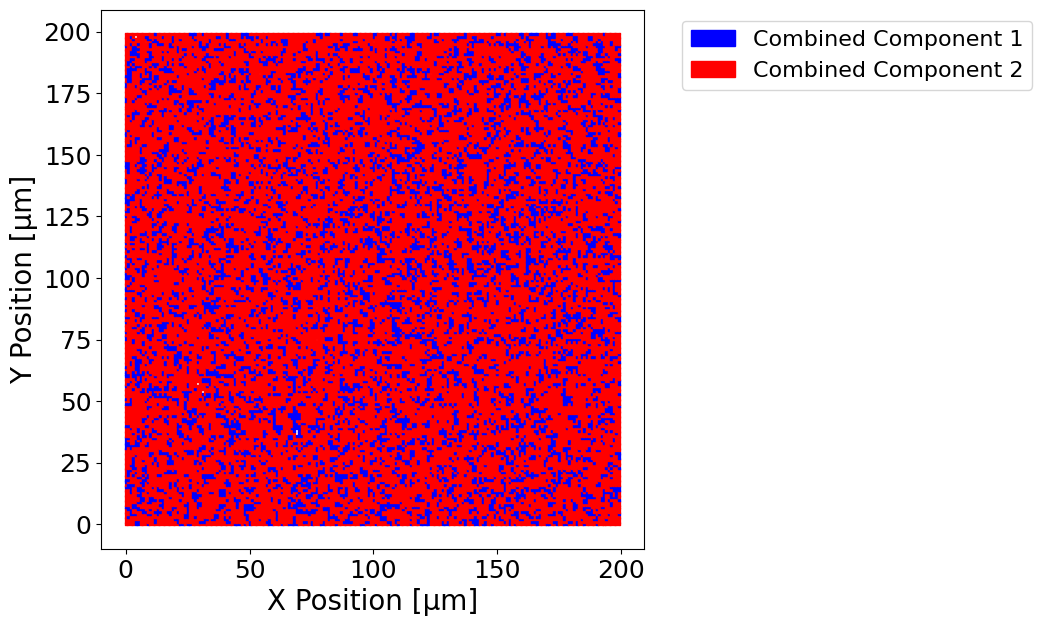

In [ ]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Define colors for 2 phases
colors = ['blue', 'red']

# HARDNESS probabilities for 2 phases
probabilities_hardness = np.zeros((len(X), 2))  # We now have two components
for i, x in enumerate(X):
    p1_hardness = w1 * skewnorm.pdf(x, params[6], loc=loc1, scale=params[5])
    p2_hardness = w2 * skewnorm.pdf(x, params[8], loc=loc2, scale=params[7])
    total_prob_hardness = p1_hardness + p2_hardness
    probabilities_hardness[i] = [p1_hardness / total_prob_hardness, p2_hardness / total_prob_hardness]

# MODULUS probabilities for 2 phases
probabilities_modulus = np.zeros((len(Y), 2))  # We now have two components
for i, y in enumerate(Y):
    p1_modulus = w1 * skewnorm.pdf(y, params_modulus[4], loc=loc1_mod, scale=params_modulus[3])
    p2_modulus = w2 * skewnorm.pdf(y, params_modulus[6], loc=loc2_mod, scale=params_modulus[5])
    total_prob_modulus = p1_modulus + p2_modulus
    probabilities_modulus[i] = [p1_modulus / total_prob_modulus, p2_modulus / total_prob_modulus]

# Combine the normalized probabilities without normalization for two phases
combined_probabilities_weighted = (weight_hardness * probabilities_hardness) + \
                                  (weight_modulus * probabilities_modulus)

# Assign each data point to a cluster based on combined weighted probabilities
combined_clusters_weighted = np.argmax(combined_probabilities_weighted, axis=1) + 1  # Cluster labels start from 1

# Calculate the percentage of data points in each cluster
cluster_1_count = np.sum(combined_clusters_weighted == 1)
cluster_2_count = np.sum(combined_clusters_weighted == 2)

total_points = len(combined_clusters_weighted)

percentage_cluster_1 = (cluster_1_count / total_points) * 100
percentage_cluster_2 = (cluster_2_count / total_points) * 100

# Print the percentage of data points in each cluster
print(f"Cluster 1: {percentage_cluster_1:.2f}% of the data points")
print(f"Cluster 2: {percentage_cluster_2:.2f}% of the data points")

# Plot a scatterplot of the clusters in X Position vs Y Position with normalized and weighted probabilities
plt.figure(figsize=(7, 7))  # Set the figure size to 7x7 inches
scatter = plt.scatter(df['X'], df['Y'], c=[colors[i-1] for i in combined_clusters_weighted], marker='s', s=2)

# Create custom legend handles for X and Y positions
legend_handles_combined_weighted = []
for cluster_combined in range(1, 3):  # Now 2 clusters
    color = colors[cluster_combined - 1]
    legend_handles_combined_weighted.append(mpatches.Patch(color=color, label=f'{cluster_combined}'))

plt.xlabel('X Position [µm]', fontsize=20)
plt.ylabel('Y Position [µm]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(handles=legend_handles_combined_weighted, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.show()


# 3 clusters

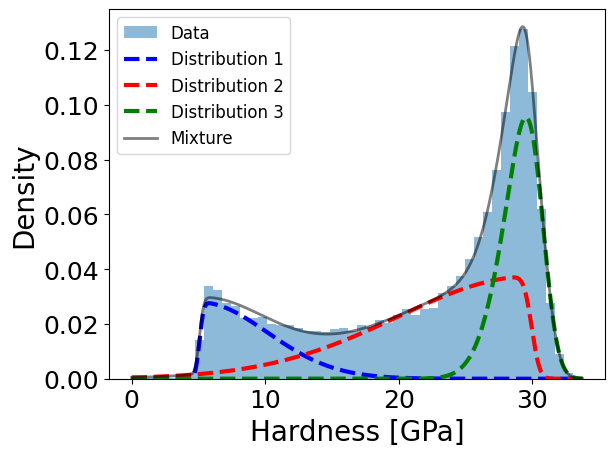

Parameter values Hardness:
w1: 0.18
w2: 0.47
w3: 0.35
loc1: 5.09
loc2: 29.96
loc3: 30.70
scale1: 5.07
alpha1: 20.00
scale2: 10.00
alpha2: -21.13
scale3: 2.30
alpha3: -2.36


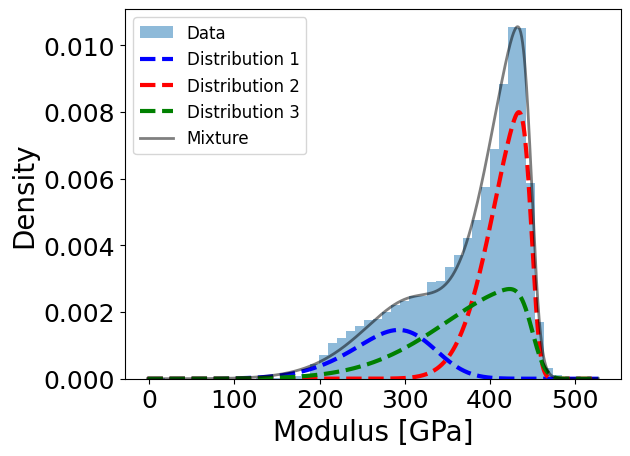

Parameter values Modulus:
w1: 0.18
w2: 0.47
w3: 0.35
loc1_mod: 330.87
loc2_mod: 448.66
loc3_mod: 449.66
scale1_mod: 72.38
alpha1_mod: -2.04
scale2_mod: 42.87
alpha2_mod: -5.53
scale3_mod: 100.00
alpha3_mod: -8.39


In [ ]:

# HARDNESS

hist, bin_edges = np.histogram(X, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define the bounds for the parameters (3 phases)
# Bounds for: w1, w3, loc1, d1, d2, scale1, alpha1, scale2, alpha2, scale3, alpha3
bounds = [
    (0, b),             # w1 (weight for phase 1)
    (0, 1),             # w3 (weight for phase 3)
    (0, 10),            # loc1 (location of phase 1)
    (0.5, 100),         # d1 (distance between loc1 and loc2)
    (0.5, 100),         # d2 (distance between loc2 and loc3)
    (0.1, 10),          # scale1 (spread for phase 1)
    (-100, 20),         # alpha1 (skewness for phase 1)
    (0.1, 10),          # scale2 (spread for phase 2)
    (-100, 20),         # alpha2 (skewness for phase 2)
    (0.1, 10),          # scale3 (spread for phase 3)
    (-100, 20)          # alpha3 (skewness for phase 3)
]

# Perform the optimization using differential evolution for HARDNESS
result = differential_evolution(
    error_function_3phases,
    bounds,
    args=(bin_centers, hist),
    maxiter=10000,        # Max number of iterations
    tol=1e-7,             # Tolerance for convergence
    popsize=30            # Population size (optional: larger value explores more)
)

# Extract optimized parameters
params = result.x

# Calculate w2 (since w1 + w2 + w3 = 1)
w1 = params[0]
w3 = params[1]
w2 = 1 - (w1 + w3)

# Calculate loc2 and loc3 based on the distances
loc1 = params[2]
loc2 = loc1 + params[3]
loc3 = loc2 + params[4]

# Generate fitted skew-normal distributions for the 3 phases
x = np.linspace(np.min(X), np.max(X), 1000)
skew_normal_1 = skewnorm.pdf(x, params[6], loc=loc1, scale=params[5])
skew_normal_2 = skewnorm.pdf(x, params[8], loc=loc2, scale=params[7])
skew_normal_3 = skewnorm.pdf(x, params[10], loc=loc3, scale=params[9])

# Plot the histogram and fitted distributions (Hardness)
plt.hist(X, bins=50, density=True, alpha=0.5, label='Data')
plt.plot(x, w1 * skew_normal_1, 'b--', lw=3, alpha=1, label='Distribution 1')
plt.plot(x, w2 * skew_normal_2, 'r--', lw=3, alpha=1, label='Distribution 2')
plt.plot(x, w3 * skew_normal_3, 'g--', lw=3, alpha=1, label='Distribution 3')

# Plot the mixture of skew-normal distributions
y = w1 * skew_normal_1 + w2 * skew_normal_2 + w3 * skew_normal_3
plt.plot(x, y, 'k-', lw=2, alpha=0.5, label='Mixture')

# Labels and legend for Hardness
plt.xlabel('Hardness [GPa]', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=12)
plt.show()

# Print parameter values for hardness
print("Parameter values Hardness:")
print(f"w1: {w1:.2f}")
print(f"w2: {w2:.2f}")
print(f"w3: {w3:.2f}")
print(f"loc1: {loc1:.2f}")
print(f"loc2: {loc2:.2f}")
print(f"loc3: {loc3:.2f}")
print(f"scale1: {params[5]:.2f}")
print(f"alpha1: {params[6]:.2f}")
print(f"scale2: {params[7]:.2f}")
print(f"alpha2: {params[8]:.2f}")
print(f"scale3: {params[9]:.2f}")
print(f"alpha3: {params[10]:.2f}")


# MODULUS

# Histograma para el Modulus
hist_modulus, bin_edges_modulus = np.histogram(Y, bins=50, density=True)
bin_centers_modulus = (bin_edges_modulus[:-1] + bin_edges_modulus[1:]) / 2

# Define the error function for Modulus with fixed w1, w2, w3 from Hardness
def error_function_modulus(params_mod, bin_centers_mod, hist_mod):
    # Extract parameters from the params_mod array
    loc1_mod, d1_mod, d2_mod, scale1_mod, alpha1_mod, scale2_mod, alpha2_mod, scale3_mod, alpha3_mod = params_mod

    # Calculate loc2_mod and loc3_mod ensuring the distance constraints
    loc2_mod = loc1_mod + d1_mod
    loc3_mod = loc2_mod + d2_mod

    # Generate the skew-normal distributions for Modulus
    dist1_mod = skewnorm.pdf(bin_centers_mod, alpha1_mod, loc=loc1_mod, scale=scale1_mod)
    dist2_mod = skewnorm.pdf(bin_centers_mod, alpha2_mod, loc=loc2_mod, scale=scale2_mod)
    dist3_mod = skewnorm.pdf(bin_centers_mod, alpha3_mod, loc=loc3_mod, scale=scale3_mod)

    # Weighted sum of the three distributions (weights w1, w2, w3 are fixed from Hardness)
    y_fit_mod = w1 * dist1_mod + w2 * dist2_mod + w3 * dist3_mod

    # Calculate the error (sum of squared differences)
    return np.sum((hist_mod - y_fit_mod) ** 2)

# Bounds for Modulus optimization (without optimizing w1, w2, w3)
# Bounds for: loc1_mod, d1_mod, d2_mod, scale1_mod, alpha1_mod, scale2_mod, alpha2_mod, scale3_mod, alpha3_mod
bounds_modulus = [
    (0, 400),         # loc1_mod (location of phase 1 for Modulus)
    (50, 1000),       # d1_mod (distance between loc1_mod and loc2_mod)
    (1, 10),       # d2_mod (distance between loc2_mod and loc3_mod)
    (0.1, 100),       # scale1_mod (spread for phase 1 for Modulus)
    (-100, 20),       # alpha1_mod (skewness for phase 1 for Modulus)
    (0.1, 100),       # scale2_mod (spread for phase 2 for Modulus)
    (-100, 20),       # alpha2_mod (skewness for phase 2 for Modulus)
    (0.1, 100),       # scale3_mod (spread for phase 3 for Modulus)
    (-100, 20)        # alpha3_mod (skewness for phase 3 for Modulus)
]

# Perform the optimization using differential evolution for Modulus
result_modulus = differential_evolution(
    error_function_modulus,
    bounds_modulus,
    args=(bin_centers_modulus, hist_modulus),
    maxiter=10000,        # Max number of iterations
    tol=1e-7,             # Tolerance for convergence
    popsize=30            # Population size (optional: larger value explores more)
)

# Extract optimized parameters for Modulus
params_modulus = result_modulus.x

# Calculate loc2_mod and loc3_mod based on the distances
loc1_mod = params_modulus[0]
loc2_mod = loc1_mod + params_modulus[1]
loc3_mod = loc2_mod + params_modulus[2]

# Generate fitted skew-normal distributions for the 3 phases (Modulus)
x_mod = np.linspace(np.min(Y), np.max(Y), 1000)
skew_normal_1_mod = skewnorm.pdf(x_mod, params_modulus[4], loc=loc1_mod, scale=params_modulus[3])
skew_normal_2_mod = skewnorm.pdf(x_mod, params_modulus[6], loc=loc2_mod, scale=params_modulus[5])
skew_normal_3_mod = skewnorm.pdf(x_mod, params_modulus[8], loc=loc3_mod, scale=params_modulus[7])

# Plot the histogram and fitted distributions (Modulus)
plt.hist(Y, bins=50, density=True, alpha=0.5, label='Data')
plt.plot(x_mod, w1 * skew_normal_1_mod, 'b--', lw=3, alpha=1, label='Distribution 1')
plt.plot(x_mod, w2 * skew_normal_2_mod, 'r--', lw=3, alpha=1, label='Distribution 2')
plt.plot(x_mod, w3 * skew_normal_3_mod, 'g--', lw=3, alpha=1, label='Distribution 3')

# Plot the mixture of skew-normal distributions for Modulus
y_modulus = w1 * skew_normal_1_mod + w2 * skew_normal_2_mod + w3 * skew_normal_3_mod
plt.plot(x_mod, y_modulus, 'k-', lw=2, alpha=0.5, label='Mixture')

# Labels and legend for Modulus
plt.xlabel('Modulus [GPa]', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=12)
plt.show()

# Print parameter values for Modulus
print("Parameter values Modulus:")
print(f"w1: {w1:.2f}")
print(f"w2: {w2:.2f}")
print(f"w3: {w3:.2f}")
print(f"loc1_mod: {loc1_mod:.2f}")
print(f"loc2_mod: {loc2_mod:.2f}")
print(f"loc3_mod: {loc3_mod:.2f}")
print(f"scale1_mod: {params_modulus[3]:.2f}")
print(f"alpha1_mod: {params_modulus[4]:.2f}")
print(f"scale2_mod: {params_modulus[5]:.2f}")
print(f"alpha2_mod: {params_modulus[6]:.2f}")
print(f"scale3_mod: {params_modulus[7]:.2f}")
print(f"alpha3_mod: {params_modulus[8]:.2f}")



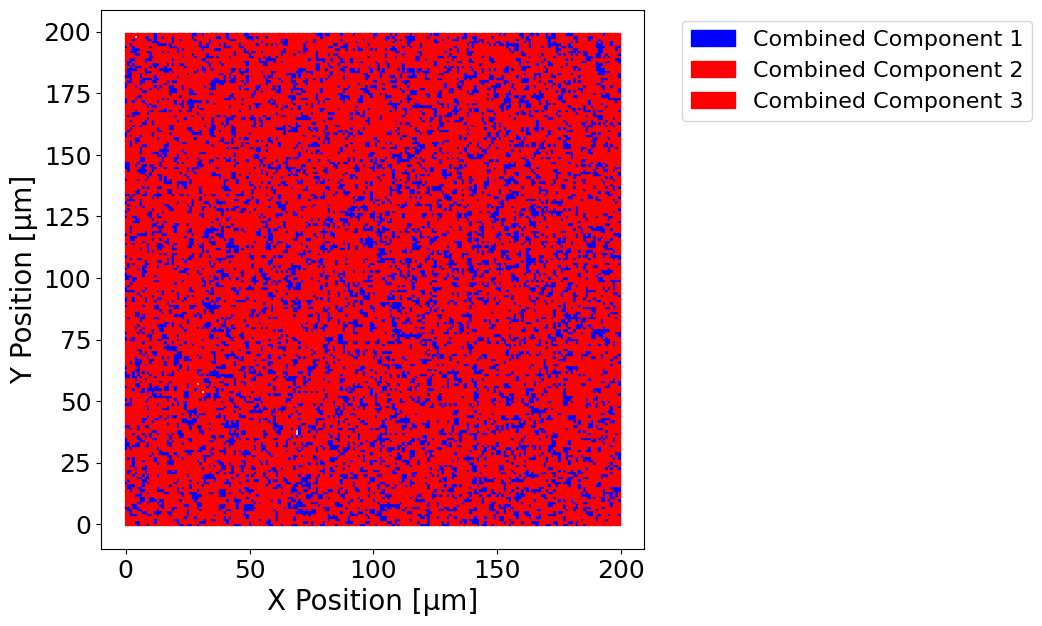

In [ ]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Define colors for 3 phases
colors = ['blue', 'red', 'red']

# HARDNESS probabilities for 3 phases
probabilities_hardness = np.zeros((len(X), 3))  # We now have three components
for i, x in enumerate(X):
    p1_hardness = w1 * skewnorm.pdf(x, params[6], loc=loc1, scale=params[5])
    p2_hardness = w2 * skewnorm.pdf(x, params[8], loc=loc2, scale=params[7])
    p3_hardness = w3 * skewnorm.pdf(x, params[10], loc=loc3, scale=params[9])
    total_prob_hardness = p1_hardness + p2_hardness + p3_hardness
    probabilities_hardness[i] = [p1_hardness / total_prob_hardness, p2_hardness / total_prob_hardness, p3_hardness / total_prob_hardness]

# MODULUS probabilities for 3 phases
probabilities_modulus = np.zeros((len(Y), 3))  # We now have three components
for i, y in enumerate(Y):
    p1_modulus = w1 * skewnorm.pdf(y, params_modulus[4], loc=loc1_mod, scale=params_modulus[3])
    p2_modulus = w2 * skewnorm.pdf(y, params_modulus[6], loc=loc2_mod, scale=params_modulus[5])
    p3_modulus = w3 * skewnorm.pdf(y, params_modulus[8], loc=loc3_mod, scale=params_modulus[7])
    total_prob_modulus = p1_modulus + p2_modulus + p3_modulus
    probabilities_modulus[i] = [p1_modulus / total_prob_modulus, p2_modulus / total_prob_modulus, p3_modulus / total_prob_modulus]

# Normalize the Hardness probabilities so that they sum to 1 for each data point
probabilities_hardness_normalized = probabilities_hardness / probabilities_hardness.sum(axis=1, keepdims=True)

# Normalize the Modulus probabilities so that they sum to 1 for each data point
probabilities_modulus_normalized = probabilities_modulus / probabilities_modulus.sum(axis=1, keepdims=True)

# Define custom weights for Hardness and Modulus probabilities
weight_hardness = 0.5  # Hardness should have more influence
weight_modulus = 0.5   # Modulus has less influence

# Combine the normalized probabilities using a weighted sum instead of multiplying
combined_probabilities_weighted = (weight_hardness * probabilities_hardness_normalized) + \
                                  (weight_modulus * probabilities_modulus_normalized)

# Assign each data point to a cluster based on combined weighted probabilities
combined_clusters_weighted = np.argmax(combined_probabilities_weighted, axis=1) + 1  # Cluster labels start from 1


# Plot a scatterplot of the clusters in X Position vs Y Position with normalized and weighted probabilities
plt.figure(figsize=(7, 7))  # Set the figure size to 7x7 inches
scatter = plt.scatter(df['X'], df['Y'], c=[colors[i-1] for i in combined_clusters_weighted], marker='s', s=2)

# Create custom legend handles for X and Y positions
legend_handles_combined_weighted = []
for cluster_combined in range(1, 4):  # Now 3 clusters
    color = colors[cluster_combined - 1]
    legend_handles_combined_weighted.append(mpatches.Patch(color=color, label=f'Combined Component {cluster_combined}'))

plt.xlabel('X Position [µm]', fontsize=20)
plt.ylabel('Y Position [µm]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(handles=legend_handles_combined_weighted, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.show()



In [ ]:
# Calculate the percentage of data points in each cluster
cluster_1_count = np.sum(combined_clusters_weighted == 1)
cluster_2_count = np.sum(combined_clusters_weighted == 2)
cluster_3_count = np.sum(combined_clusters_weighted == 3)

total_points = len(combined_clusters_weighted)

percentage_cluster_1 = (cluster_1_count / total_points) * 100
percentage_cluster_2 = (cluster_2_count / total_points) * 100
percentage_cluster_3 = (cluster_3_count / total_points) * 100

# Print the percentage of data points in each cluster
print(f"Cluster 1: {percentage_cluster_1:.2f}% of the data points")
print(f"Cluster 2: {percentage_cluster_2:.2f}% of the data points")
print(f"Cluster 3: {percentage_cluster_3:.2f}% of the data points")

Cluster 1: 20.72% of the data points
Cluster 2: 58.12% of the data points
Cluster 3: 21.16% of the data points


In [ ]:
# Plot a scatterplot of the clusters in HARDNESS vs MODULUS with normalized and weighted probabilities
plt.figure(figsize=(7, 7))
scatter = plt.scatter(df['HARDNESS'], df['MODULUS'], c=[colors[i-1] for i in combined_clusters_weighted], marker='s', s=2)

# Create custom legend handles for the weighted combined components
legend_handles_combined_weighted = []
for cluster_combined in range(1, 3):  # Only 2 clusters
    color = colors[cluster_combined - 1]
    legend_handles_combined_weighted.append(mpatches.Patch(color=color, label=f'Combined Component {cluster_combined}'))

plt.xlabel('Hardness [GPa]', fontsize=20)
plt.ylabel('Modulus [GPa]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(handles=legend_handles_combined_weighted, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.show()